<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.392582,95.644676,-0.025138,184.012119,184.040020,-0.027901
1,0.0,1.0,45.671723,46.265613,0.041682,101.979019,101.934510,0.044509
2,0.0,2.0,73.455860,48.902217,0.027365,132.385443,132.356128,0.029315
3,0.0,3.0,33.865163,36.835060,-0.027762,80.672461,80.696206,-0.023745
4,0.0,4.0,20.389721,50.752412,0.027488,81.169621,81.139187,0.030434
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.933248,93.434074,-0.021175,150.346147,150.378311,-0.032164
249996,999.0,246.0,31.014248,65.351009,-0.045395,106.319862,106.368557,-0.048695
249997,999.0,247.0,51.852825,85.465383,-0.014280,147.303927,147.326417,-0.022490
249998,999.0,248.0,58.795313,87.368393,0.037923,156.201629,156.172064,0.029564


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.392582,95.644676,-0.025138,184.012119,184.040020,-0.027901
1,0.0,1.0,45.671723,46.265613,0.041682,101.979019,101.934510,0.044509
2,0.0,2.0,73.455860,48.902217,0.027365,132.385443,132.356128,0.029315
3,0.0,3.0,33.865163,36.835060,-0.027762,80.672461,80.696206,-0.023745
4,0.0,4.0,20.389721,50.752412,0.027488,81.169621,81.139187,0.030434
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.933248,93.434074,-0.021175,150.346147,150.378311,-0.032164
249996,999.0,246.0,31.014248,65.351009,-0.045395,106.319862,106.368557,-0.048695
249997,999.0,247.0,51.852825,85.465383,-0.014280,147.303927,147.326417,-0.022490
249998,999.0,248.0,58.795313,87.368393,0.037923,156.201629,156.172064,0.029564


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.392582  95.644676 -0.025138  184.012119  184.040020 -0.027901
      1.0    45.671723  46.265613  0.041682  101.979019  101.934510  0.044509
      2.0    73.455860  48.902217  0.027365  132.385443  132.356128  0.029315
      3.0    33.865163  36.835060 -0.027762   80.672461   80.696206 -0.023745
      4.0    20.389721  50.752412  0.027488   81.169621   81.139187  0.030434
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.933248  93.434074 -0.021175  150.346147  150.378311 -0.032164
      246.0  31.014248  65.351009 -0.045395  106.319862  106.368557 -0.048695
      247.0  51.852825  85.465383 -0.014280  147.303927  147.326417 -0.022490
      248.0  58.795313  87.368393  0.037923  156.201629  156.172064  0.029564
      249.0  55.115940  84.756781 -0.006751  149.865970  149.880504 -0.014534

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.392582  95.644676 -0.025138  184.012119  184.040020 -0.027901
      1.0    45.671723  46.265613  0.041682  101.979019  101.934510  0.044509
      2.0    73.455860  48.902217  0.027365  132.385443  132.356128  0.029315
      3.0    33.865163  36.835060 -0.027762   80.672461   80.696206 -0.023745
      4.0    20.389721  50.752412  0.027488   81.169621   81.139187  0.030434
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.933248  93.434074 -0.021175  150.346147  150.378311 -0.032164
      246.0  31.014248  65.351009 -0.045395  106.319862  106.368557 -0.048695
      247.0  51.852825  85.465383 -0.014280  147.303927  147.326417 -0.022490
      248.0  58.795313  87.368393  0.037923  156.201629  156.172064  0.029564
      249.0  55.115940  84.756781 -0.006751  149.865970  149.880504 -0.014534

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.392582,95.644676,-0.025138,184.012119,184.040020,-0.027901
1,0.0,1.0,45.671723,46.265613,0.041682,101.979019,101.934510,0.044509
2,0.0,2.0,73.455860,48.902217,0.027365,132.385443,132.356128,0.029315
3,0.0,3.0,33.865163,36.835060,-0.027762,80.672461,80.696206,-0.023745
4,0.0,4.0,20.389721,50.752412,0.027488,81.169621,81.139187,0.030434
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.933248,93.434074,-0.021175,150.346147,150.378311,-0.032164
249996,999.0,246.0,31.014248,65.351009,-0.045395,106.319862,106.368557,-0.048695
249997,999.0,247.0,51.852825,85.465383,-0.014280,147.303927,147.326417,-0.022490
249998,999.0,248.0,58.795313,87.368393,0.037923,156.201629,156.172064,0.029564


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.392582  95.644676 -0.025138  184.012119  184.040020 -0.027901
      1.0    45.671723  46.265613  0.041682  101.979019  101.934510  0.044509
      2.0    73.455860  48.902217  0.027365  132.385443  132.356128  0.029315
      3.0    33.865163  36.835060 -0.027762   80.672461   80.696206 -0.023745
      4.0    20.389721  50.752412  0.027488   81.169621   81.139187  0.030434
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.933248  93.434074 -0.021175  150.346147  150.378311 -0.032164
      246.0  31.014248  65.351009 -0.045395  106.319862  106.368557 -0.048695
      247.0  51.852825  85.465383 -0.014280  147.303927  147.326417 -0.022490
      248.0  58.795313  87.368393  0.037923  156.201629  156.172064  0.029564
      249.0  55.115940  84.756781 -0.006751  149.865970  149.880504 -0.014534

[250000 rows x 6 columns]

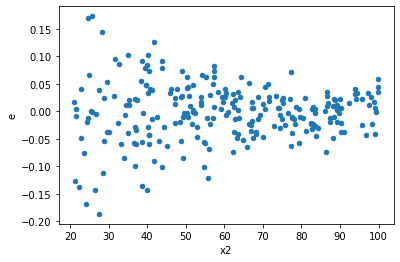

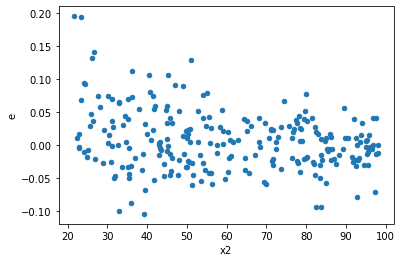

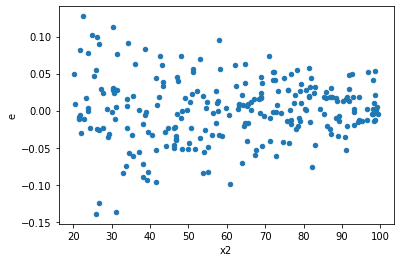

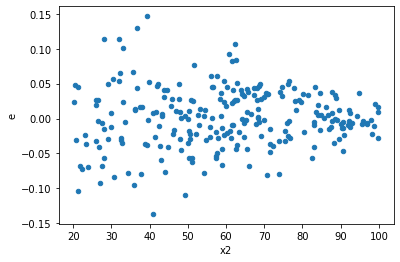

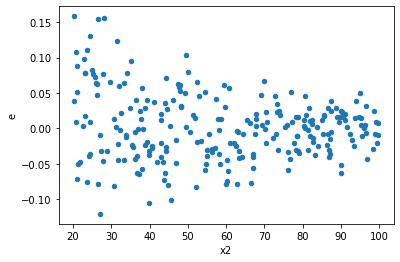

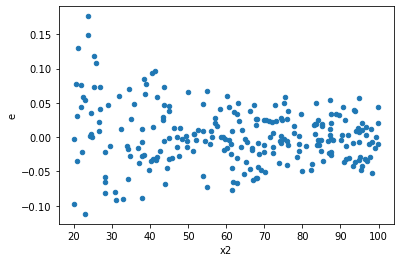

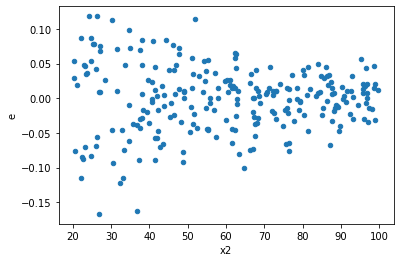

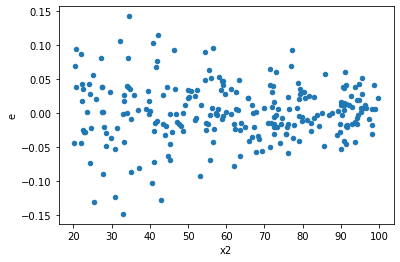

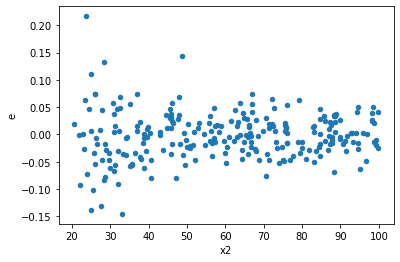

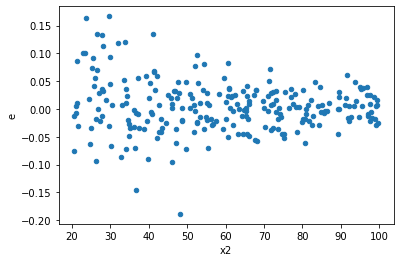

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.3918165891063491,0.13016624440889518,0.003998128460268868,0.0013282269837642366,0.33221218301597927,1.0843046573240574e-07,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.27926128222562147,0.12169852498126923,0.002849604920669607,0.001241821683482339,0.43578731720835634,5.250679323468093e-05,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.2534903029628886,0.10200465525564917,0.0025866357445192716,0.0010408638291392771,0.40240062070769944,9.854886798618124e-06,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.25776250592958766,0.12361342745028432,0.002630229652342731,0.001261361504594738,0.47956325922766874,0.0003323609900840457,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.32573477211399,0.08500854312371464,0.003323824205244796,0.0008674341135072923,0.2609747266833586,1.4940317206544476e-10,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.25401052748980485,0.09652882761628241,0.0025919441580592333,0.000984988036900841,0.3800190038192679,2.751852152714516e-06,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.37634220114488187,0.09309381908516047,0.003840226542294713,0.000949936929440413,0.24736481532487448,3.0512488205731265e-11,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.2472114668000132,0.08112532735226281,0.002522565987755237,0.000827809462778192,0.32816166823641235,7.943651683342478e-08,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.2602090316606175,0.09316196893682104,0.0026551942006185457,0.0009506323360900106,0.3580274225774349,6.830132990827465e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    982
Reject001=1 : Homoscedasticity       18
Name: Result_test, dtype: int64